# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

## Data Exploration

In [4]:
print("Dimensions:", df.shape)
print("\n Columns:\n", df.dtypes)
print("\n First raws:")
display(df.head())

Dimensions: (18442, 9)

 Columns:
 Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Recommended IND             int64
dtype: object

 First raws:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


In [5]:
print("\n Null values by column:")
print(df.isnull().sum())

print("\n Duplicates in the database :", df.duplicated().sum())


 Null values by column:
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

 Duplicates in the database : 0


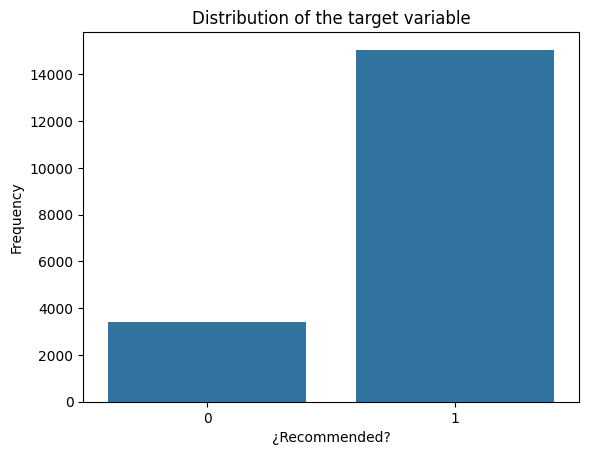

Recommended IND
1    0.816
0    0.184
Name: proportion, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Recommended IND', data=df)
plt.title("Distribution of the target variable")
plt.xlabel("¿Recommended?")
plt.ylabel("Frequency")
plt.show()

print(df['Recommended IND'].value_counts(normalize=True).round(3))

 Basic statistics:


,Age,Positive Feedback Count
count,18442.000000,18442.000000
mean,43.383635,2.697484
std,12.246264,5.942220
min,18.000000,0.000000
25%,34.000000,0.000000
50%,41.000000,1.000000
75%,52.000000,3.000000
max,99.000000,122.000000


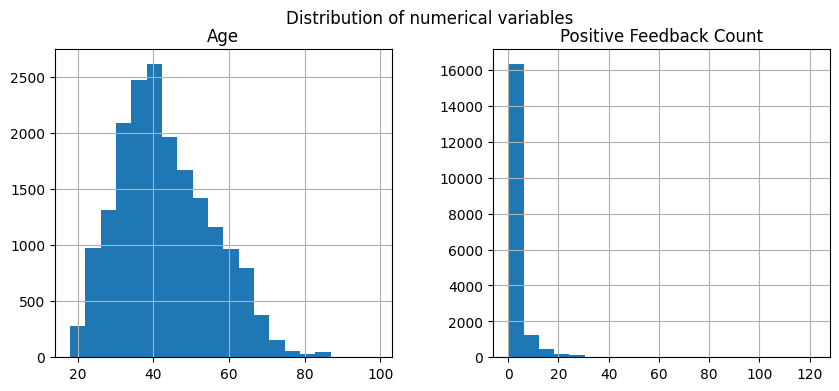

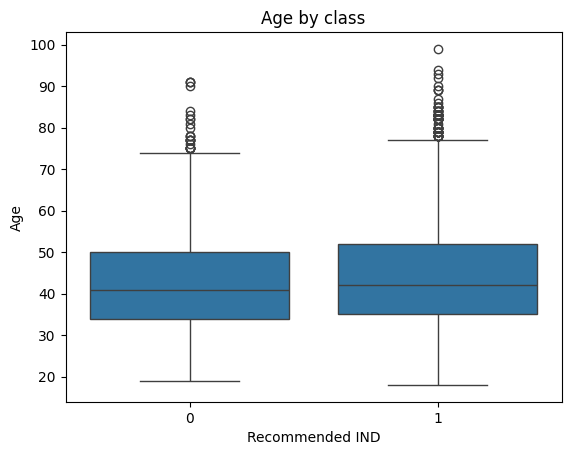

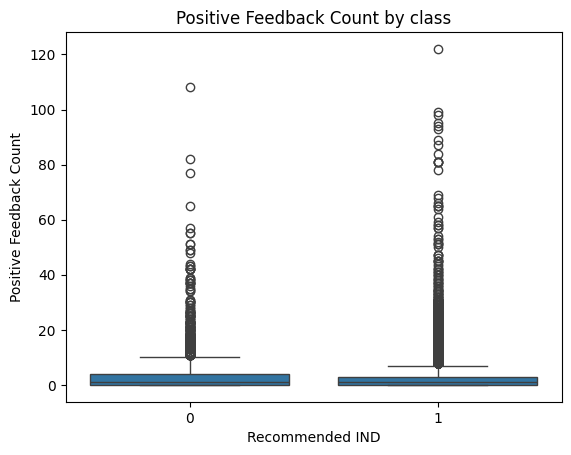

In [7]:
num_vars = ['Age', 'Positive Feedback Count']

print(" Basic statistics:")
display(df[num_vars].describe())

# Hsitogram
df[num_vars].hist(bins=20, figsize=(10, 4))
plt.suptitle("Distribution of numerical variables")
plt.show()

# Boxplot class
for col in num_vars:
    sns.boxplot(x='Recommended IND', y=col, data=df)
    plt.title(f"{col} by class")
    plt.show()

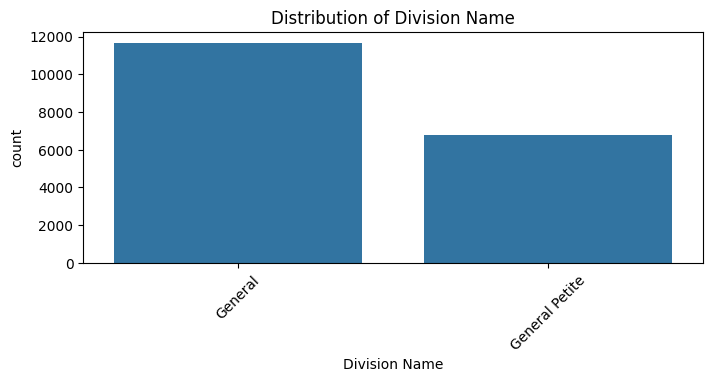

Recommended IND     0     1
Division Name              
General          0.19  0.81
General Petite   0.18  0.82


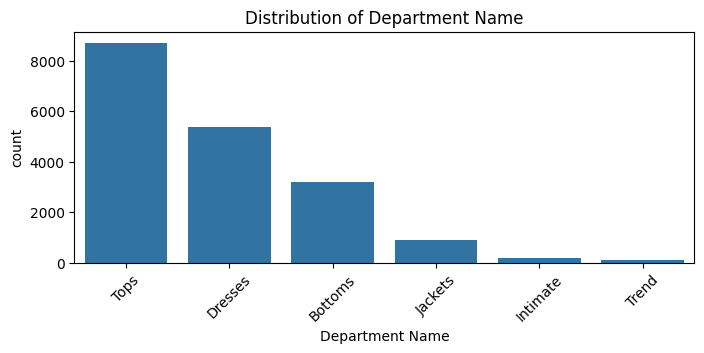

Recommended IND     0     1
Department Name            
Bottoms          0.15  0.85
Dresses          0.20  0.80
Intimate         0.16  0.84
Jackets          0.16  0.84
Tops             0.19  0.81
Trend            0.24  0.76


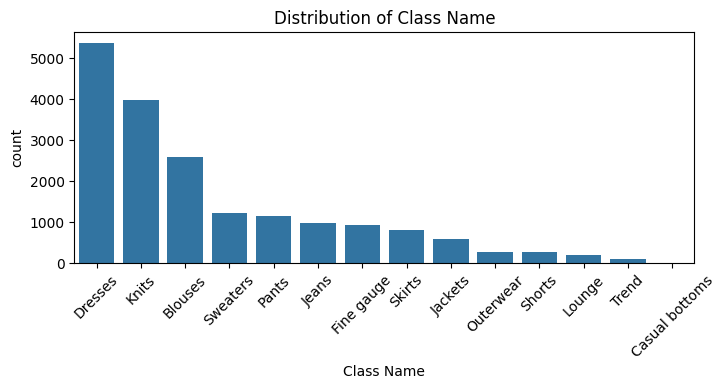

Recommended IND     0     1
Class Name                 
Blouses          0.19  0.81
Casual bottoms    NaN  1.00
Dresses          0.20  0.80
Fine gauge       0.17  0.83
Jackets          0.15  0.85
Jeans            0.12  0.88
Knits            0.19  0.81
Lounge           0.16  0.84
Outerwear        0.18  0.82
Pants            0.16  0.84
Shorts           0.17  0.83
Skirts           0.15  0.85
Sweaters         0.20  0.80
Trend            0.24  0.76


In [8]:
cat_vars = ['Division Name', 'Department Name', 'Class Name']

for col in cat_vars:
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()
    
    print(df.groupby(col)['Recommended IND'].value_counts(normalize=True).unstack().round(2))

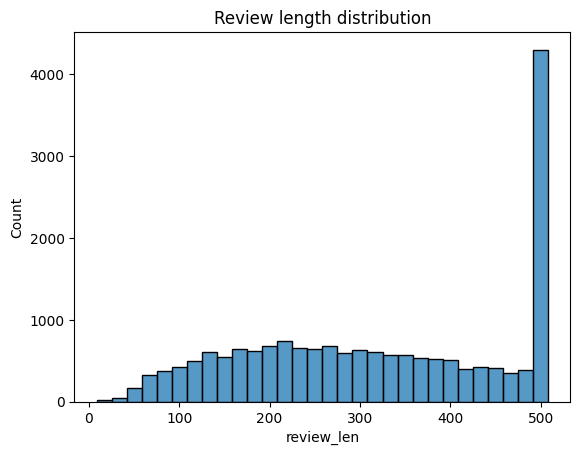

 Average review length: 319.98953475761846
 Max: 508


In [23]:
# Text length
df['review_len'] = df['Review Text'].fillna('').apply(len)

sns.histplot(df['review_len'], bins=30)
plt.title("Review length distribution")
plt.show()

print(" Average review length:", df['review_len'].mean())
print(" Max:", df['review_len'].max())


In [10]:
!pip install nltk
import string
import nltk
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
from sklearn.preprocessing import OrdinalEncoder
from collections import Counter
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.0 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/student/nltk_data...


In [11]:
def obtener_frecuencias(textos):
    stop_words = set(stopwords.words('english'))
    tokens = []

    for texto in textos.dropna():
        texto = texto.lower().translate(str.maketrans('', '', string.punctuation))
        tokens.extend([
            word for word in word_tokenize(texto)
            if word.isalpha() and word not in stop_words
        ])

    return Counter(tokens).most_common(15)

# Most frequent words for class
for label in [0, 1]:
    print(f"\n Most frequent words for class {label} (Recommended IND = {label}):")
    textos = df[df['Recommended IND'] == label]['Review Text']
    print(obtener_frecuencias(textos))


 Most frequent words for class 0 (Recommended IND = 0):
[('dress', 1729), ('like', 1466), ('top', 1327), ('fit', 1130), ('would', 1091), ('fabric', 1070), ('size', 1018), ('back', 863), ('look', 835), ('im', 783), ('love', 780), ('really', 728), ('small', 726), ('ordered', 714), ('color', 625)]

 Most frequent words for class 1 (Recommended IND = 1):
[('dress', 7352), ('love', 6486), ('size', 6319), ('fit', 5036), ('top', 4858), ('wear', 4722), ('great', 4535), ('like', 4412), ('im', 4219), ('color', 3255), ('would', 3104), ('fabric', 3014), ('small', 2980), ('perfect', 2950), ('little', 2838)]


In [24]:
df['review_len'] = df['Review Text'].fillna('').apply(lambda x: len(x.split()))
df.groupby('Recommended IND')['review_len'].describe()

,count,mean,std,min,25%,50%,75%,max
Recommended IND,,,,,,,,
0,3389.0,63.797875,26.687656,3.0,41.0,64.0,90.0,111.0
1,15053.0,62.145752,28.447011,2.0,38.0,62.0,90.0,115.0


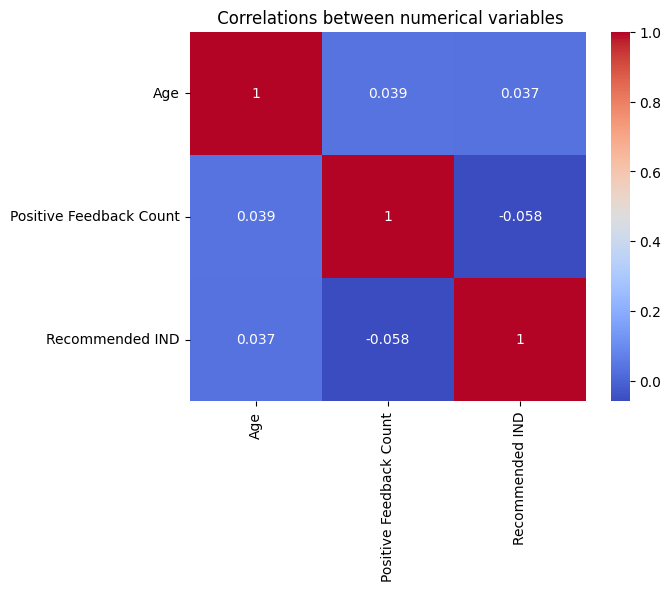

In [13]:
import numpy as np

corr = df[num_vars + ['Recommended IND']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title(" Correlations between numerical variables")
plt.show()

## Building Pipeline

We're going to define the following feature groups:

- Numerical: `num_features`
- Categorical: `cat_features`
- Text: `text_features`

In [14]:

"""

StemLemmatizerTokenizer: It is a custom tokenizer class built to improve text:
-Normalization (lowercasing, punctuation removal)
-Tokenization (splitting text into words)
-Stopword removal (eliminating common, uninformative words)
-Stemming (reducing words to root forms)
-Lemmatization (converting words to their dictionary base forms)

We include a TextStatsExtractor that counts the number of words and the length of the text

"""

class StemLemmatizerTokenizer:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, doc):
        # Normalize: lowercase and remove punctuation
        doc = doc.lower().translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(doc)

        # Tokenize, stem, and lemmatize while removing stopwords
        return [
            self.lemmatizer.lemmatize(self.stemmer.stem(word))
            for word in tokens
            if word.isalpha() and word not in self.stop_words
        ]

# Variables
numeric_features = ['Age', 'Positive Feedback Count']
categorical_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']
text_title = 'Title'
text_review = 'Review Text'

# Additional text features
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.DataFrame({
            'text_length': X[text_review].str.len(),
            'word_count': X[text_review].str.split().apply(len)
        }).fillna(0)

# Pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
        (
        'ordinal_encoder',
         OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        ))
])

title_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        tokenizer=StemLemmatizerTokenizer(),
        token_pattern = None,
        lowercase=True,
        ngram_range=(1, 2),  # ← Bigramas
        max_features=100
    ))
])

review_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        tokenizer=StemLemmatizerTokenizer(),
        token_pattern = None,
        lowercase=True,
        ngram_range=(1, 2),
        max_features=300
    ))
])

text_features_pipeline = Pipeline([
    ('text_stats', TextStatsExtractor()),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features),
    ('title', title_pipeline, text_title),
    ('review', review_pipeline, text_review),
    ('text_features', text_features_pipeline, [text_review])
])


## Training Pipeline

In [15]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Now that we have the feature engineering pipeline created, we will append a
machine learning model (a classifier) to be trained with the features
engineering pipeline. We specifically will use a RandomForestClassifier 

Instead of using sklearn pipelines, we use imblearn pipeline and include a balancing technique in the pipeline based on the characteristics of the data.

In [16]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Complete pipeline with preprocessing + balancing + model
pipeline = Pipeline([
    ('preprocessor', preprocessor),            # ColumnTransformer con num, cat, texto
    ('sampler', SMOTE(random_state=42)),       # Class balancing only in training
    ('classifier', RandomForestClassifier(random_state=42))
])

#  Model training
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Clothing ID',
                                                   'Division Name',
                                                   'Department Name',
                                                   'Class Name'])...
                                                                   TfidfVectorizer(max_features=300,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   token_pattern=None,
                                                                                   tokenizer=<__main__.StemLemmatizerTokenizer object at 0x7a5255d20220>))]),
                                                  'Review Text'),
                                                 ('text_features',
                                                  Pipeline(steps=[('text_stats',
                                                                   TextStatsExtractor()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Review Text'])])),
                ('sampler', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

## Fine-Tuning Pipeline

let's observe the accuracy of the model.

In [17]:
from sklearn.metrics import classification_report

y_pred_base = pipeline.predict(X_test)
y_proba_base = pipeline.predict_proba(X_test)[:, 1]

print("Evaluation of the base model:")
print(classification_report(y_test, y_pred_base))

Evaluation of the base model:
              precision    recall  f1-score   support

           0       0.63      0.48      0.54       327
           1       0.89      0.94      0.92      1518

    accuracy                           0.86      1845
   macro avg       0.76      0.71      0.73      1845
weighted avg       0.85      0.86      0.85      1845



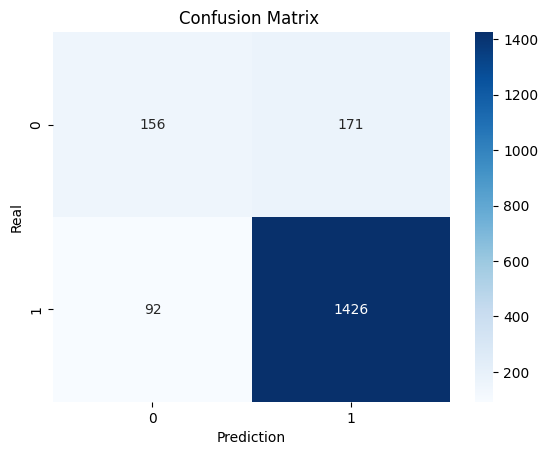

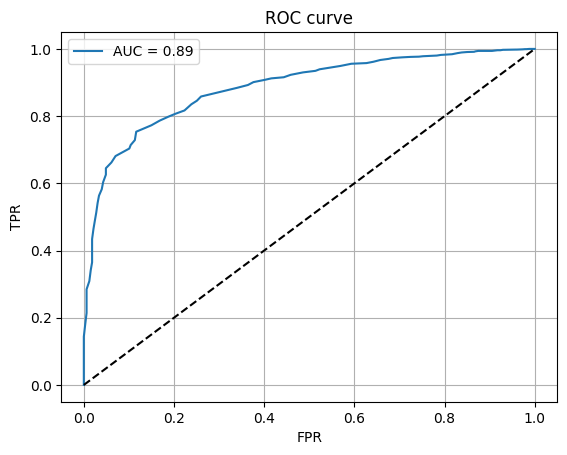

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix ")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_base)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f"ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

We can use a parameter search to better adjust the model.

Using either RandomizedSearchCV or GridSearchCV allows us to use cross-validation (CV) to better evaluate different models independent of the test set.

After finding the best parameters based on our search, we can use this fine-tuned model against the test set to observe its performance.

**The search was conducted over the following hyperparameters: **

a) max_features: Controls the number of features to consider when looking for the best split in each decision tree.
Options used: 'sqrt', 'log2', and 0.5 (i.e., 50% of the features).
b) n_estimators: The number of trees in the forest.
Options used: 150, 200.



**The RandomizedSearchCV was configured as follows: **

a) n_iter=6: Randomly sampled 6 different combinations of the given parameters.

b) cv=4: Used 4-fold cross-validation to evaluate model performance during the search.

c) refit=True: Automatically retrained the model on the full training set using the best parameters found.

d) n_jobs=-1: Enabled parallel computation by utilizing all available processors.

e) random_state=27: Ensured reproducibility of results.

f) verbose=1: Provided detailed logs of the search process.


After completing the search, the model was retrained using the best hyperparameter configuration, and this optimized model was later evaluated on the held-out test set to assess generalization performance.

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# set parameters to randomly search over
my_distributions = dict(
    classifier__max_features=[
        'sqrt',
        'log2',
         0.5,
    ],
   classifier__n_estimators=[
        150,
        200,
    ],
)

param_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=my_distributions,
    n_iter=5,     
    cv=4,        
    n_jobs=1,    
    refit=True,   
    verbose=3,    
    random_state=27,
    
)

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV 1/4] END classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.860 total time=  58.9s
[CV 2/4] END classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.872 total time=  57.5s
[CV 3/4] END classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.856 total time=  58.4s
[CV 4/4] END classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.865 total time=  57.4s
[CV 1/4] END classifier__max_features=log2, classifier__n_estimators=150;, score=0.860 total time=  34.1s
[CV 2/4] END classifier__max_features=log2, classifier__n_estimators=150;, score=0.871 total time=  34.6s
[CV 3/4] END classifier__max_features=log2, classifier__n_estimators=150;, score=0.865 total time=  34.1s
[CV 4/4] END classifier__max_features=log2, classifier__n_estimators=150;, score=0.867 total time=  34.7s
[CV 1/4] END classifier__max_features=0.5, classifier__n_estimators=200;, score=0.842 total 

{'classifier__n_estimators': 150, 'classifier__max_features': 'log2'}

In [20]:
model_best = param_search.best_estimator_
model_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Clothing ID',
                                                   'Division Name',
                                                   'Department Name',
                                                   'Class Name'])...
                                                                                   token_pattern=None,
                                                                                   tokenizer=<__main__.StemLemmatizerTokenizer object at 0x7a52554714e0>))]),
                                                  'Review Text'),
                                                 ('text_features',
                                                  Pipeline(steps=[('text_stats',
                                                                   TextStatsExtractor()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Review Text'])])),
                ('sampler', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_features='log2', n_estimators=150,
                                        random_state=42))])

In [21]:
y_pred_tuning = model_best.predict(X_test)
y_proba_tuning = model_best.predict_proba(X_test)[:, 1]

print("Evaluation of the base model:")
print(classification_report(y_test, y_pred_tuning))

Evaluation of the base model:
              precision    recall  f1-score   support

           0       0.66      0.43      0.52       327
           1       0.89      0.95      0.92      1518

    accuracy                           0.86      1845
   macro avg       0.77      0.69      0.72      1845
weighted avg       0.85      0.86      0.85      1845



Evaluation on the test set:


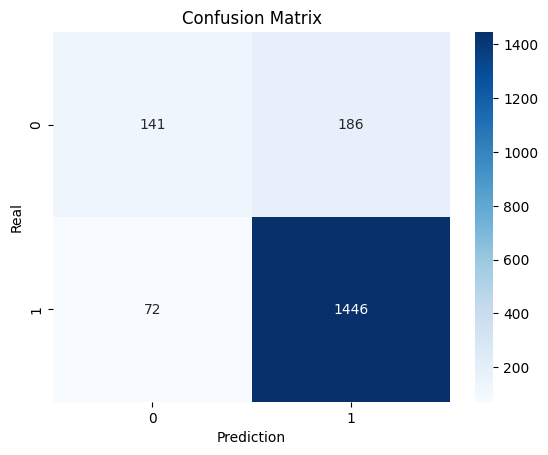

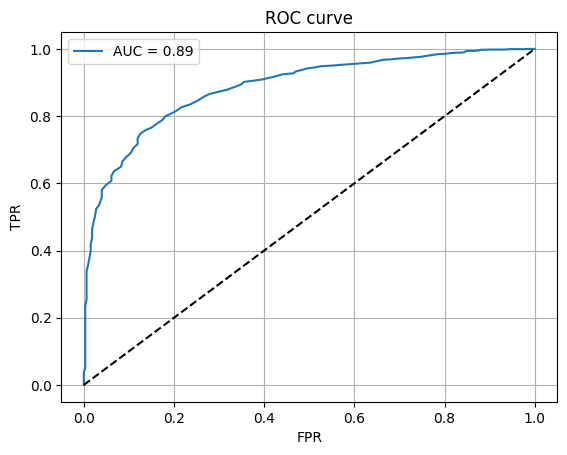

In [22]:
print("Evaluation on the test set:")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuning)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_tuning)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f"ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

Fine-Tuning does not significantly improve the results obtained. Despite the balancing exercise, the model does not perform accurately in the unbalanced class. Future exercises require efforts to improve performance.